<a href="https://colab.research.google.com/github/cpaulraj/mytest/blob/master/Lab_3_Akhil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data

This notebook demonstrated how to import data from a google sheet into a `numpy` array.


Start by running the following 3 code cells. The only modification is in the 2nd cell to change the path.

Of course, make sure your google sheet with the data is in the same google drive folder as this colab notebook.

In [ ]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt 
import scipy.optimize as opt
from google.colab import drive, auth
import gspread
from oauth2client.client import GoogleCredentials

In [ ]:
drive.mount('/content/gdrive')

# Modify this line to include your specific path.
%cd gdrive/MyDrive/PHY105/Lab3    

Mounted at /content/gdrive
[Errno 2] No such file or directory: 'gdrive/MyDrive/PHY105/Lab3'
/content


In [ ]:
# One more authentication
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

The above code cells need to be executed just once.

The below cell should be copy-pasted and modified for each google sheet you want to import. You should change the name of your array when you do, e.g. `data2`, `t2`, `y2` so you don't overwrite your previous data, and so you can keep track of which data/figure corresponds to which experimental run.

In [ ]:
# Open the google sheet
worksheet = gc.open('Lab 3 Data').worksheet('Orange Mass for Python')  # Replace with your google sheet name.

# Convert data to numpy array
rows = worksheet.get_all_values()
data_str = np.array(rows)
#print(data_str)
data1 = data_str.astype(np.float)    # data1 is a numpy array of the data in the sheet

data1.shape   # check that the shape of your array is what you expect.

(186, 2)

From here on, you should use whatever analysis methods you think are most appropriate. 

Feel free to use modified code from any previous lab if there is a similar series of steps you want to carry out.

[0.0, 2.790487, 5.583353, 8.374367, 11.166492, 13.956778, 16.748871, 19.539214, 22.33106, 25.121153, 27.912342, 30.703015, 33.493264, 36.284492, 39.073987, 41.865156, 44.654223, 47.445152, 50.23421, 53.024891, 55.813573, 58.60391, 61.393018, 64.182494, 66.972361, 69.760923, 72.551091, 75.339382, 78.129429, 80.917441, 83.707376, 86.495386, 89.285111, 92.073246, 94.862387, 97.651182, 100.439589, 103.229002, 106.016789, 108.806329, 111.593949, 114.38337, 117.170636, 119.959942, 122.747194, 125.535944, 128.323556]
2.789587792949733


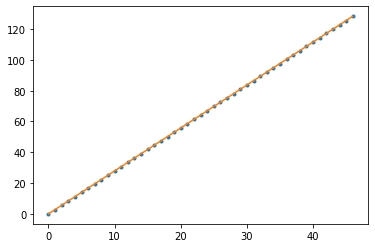

In [ ]:
truncateddata = []
counter = 0
for i in data1:
  if(counter%4 == 0):
    truncateddata.append(i[0])
  counter += 1

#print(data1)
print(truncateddata)
xaxis = np.arange(len(truncateddata))

def model(t, m, c) :    # include the correct number of parameters here.
  return m*t + c   # replace quadratic model with your model.

# first guess at parameter values. Once again, include guesses for all parameters.
m_guess = 2.80
c_guess = 0

# This is the optimization step, where the "magic" happens. 
# most of this code remains as-is, you just need to include the correct number of parameters everywhere
pars, pcov = opt.curve_fit(model, xaxis, truncateddata, p0=[m_guess, c_guess])
m_best, c_best = pars[0], pars[1]
# the best-fit parameters are now called A_best, B_best, and C_best

# construct model with best-fit parameters
Best_fit = model(xaxis, m_best, c_best)

plt.plot(xaxis,truncateddata,'.')
plt.plot(xaxis,Best_fit,'-')

print(m_best)
T_orange = m_best
orange_std = np.sqrt(pcov[0][0])

In [ ]:
# finding min and max deviation from the mean for orange mass periods
differences = []
for i in range(1, len(truncateddata)-1):
  differences.append(truncateddata[i] - truncateddata[i-1])

differences = np.array(differences)
print(differences)
min = np.min(differences)
max = np.max(differences)
print(min)
print(max)
print(max - T_orange)
print(T_orange - min)

[2.790487 2.792866 2.791014 2.792125 2.790286 2.792093 2.790343 2.791846
 2.790093 2.791189 2.790673 2.790249 2.791228 2.789495 2.791169 2.789067
 2.790929 2.789058 2.790681 2.788682 2.790337 2.789108 2.789476 2.789867
 2.788562 2.790168 2.788291 2.790047 2.788012 2.789935 2.78801  2.789725
 2.788135 2.789141 2.788795 2.788407 2.789413 2.787787 2.78954  2.78762
 2.789421 2.787266 2.789306 2.787252 2.78875 ]
2.787251999999995
2.7928659999999996
0.0032782070502666016
0.002335792949737847


In [ ]:
# Open the google sheet
worksheet = gc.open('Lab 3 Data').worksheet('Brass Mass for Python')  # Replace with your google sheet name.

# Convert data to numpy array
rows2 = worksheet.get_all_values()
data_str2 = np.array(rows2)
#print(data_str)
data2 = data_str2.astype(np.float)    # data1 is a numpy array of the data in the sheet

data2.shape   # check that the shape of your array is what you expect.

(124, 2)

[0.0, 2.788927, 5.575296, 8.362318, 11.148497, 13.935994, 16.721387, 19.508324, 22.294483, 25.080336, 27.867274, 30.652571, 33.439312, 36.224255, 39.010735, 41.795796, 44.581519, 47.367394, 50.15231, 52.938526, 55.723056, 58.509217, 61.293627, 64.079308, 66.863996, 69.649037, 72.43443, 75.21866, 78.004365, 80.788198, 83.573725]
2.7857108049087826


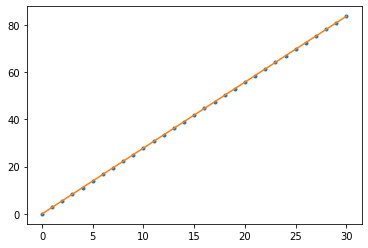

In [ ]:
truncateddata2 = []
counter = 0
for i in data2:
  if(counter%4 == 0):
    truncateddata2.append(i[0])
  counter += 1

#print(data1)
print(truncateddata2)
xaxis = np.arange(len(truncateddata2))

def model(t, m, c) :    # include the correct number of parameters here.
  return m*t + c   # replace quadratic model with your model.

# first guess at parameter values. Once again, include guesses for all parameters.
m_guess = 2.80
c_guess = 0

# This is the optimization step, where the "magic" happens. 
# most of this code remains as-is, you just need to include the correct number of parameters everywhere
pars, pcov = opt.curve_fit(model, xaxis, truncateddata2, p0=[m_guess, c_guess])
m_best, c_best = pars[0], pars[1]
# the best-fit parameters are now called A_best, B_best, and C_best

# construct model with best-fit parameters
Best_fit = model(xaxis, m_best, c_best)

plt.plot(xaxis,truncateddata2,'.')
plt.plot(xaxis,Best_fit,'-')

print(m_best)
T_brass = m_best
brass_std = np.sqrt(pcov[0][0])

In [ ]:
def gfunc (T, l):
  return (2*np.pi/T)**2 * l
length = 1.907
lengthstd = 0.005
print("mean g orange brass respectively")
print(gfunc(T_orange, length))
print(gfunc(T_brass, length))
gmax_orange = gfunc(T_orange - orange_std, length + lengthstd)
gmin_orange = gfunc(T_orange + orange_std, length - lengthstd)
gmax_brass = gfunc(T_brass - brass_std, length + lengthstd)
gmin_brass = gfunc(T_brass + brass_std, length - lengthstd)
print("orange min/max")
print(gmax_orange)
print(gmin_orange)
print("brass min/max")
print(gmax_brass)
print(gmin_brass)

mean g orange brass respectively
9.674540831623744
9.70148848161396
orange min/max
9.700408462984557
9.648675863292272
brass min/max
9.727337448221158
9.675641698252086


In [ ]:
# moment of inertia calculation:
R = .0259
L = .075
D = 1.907
orangeI = 1/4 * 1.2152 * R**2 + 1/12 * 1.2152 * L**2 + 1.2152 * D**2
brassI = 1/4 * 1.3067 * R**2 + 1/12 * 1.3067 * L**2 + 1.3067 * D**2
print(orangeI)

4.4200292818780005


In [ ]:
# new values for T

T_orange_corrected =  T_orange / 1.00430
T_brass_corrected = T_brass / 1.00430
cm_brass = 1.903792979
cm_orange = 1.902371128
totalmass_brass = 1.3117
totalmass_orange = 1.2202
totalI_brass = 4.761161271
totalI_orange = 4.422346972

def gfunc_corrected (I, M, cm, T):
  return (2*np.pi/T)**2 * I / (M * cm)

g_orange = gfunc_corrected(totalI_orange, totalmass_orange, cm_orange, T_orange_corrected)
g_brass = gfunc_corrected(totalI_brass, totalmass_brass, cm_brass, T_brass_corrected)
print(g_brass)
print(g_orange)

9.78302712237912
9.748395516826967


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example error bar values that vary with x-position
error = 0.1 + 0.2 * x

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar([0, 1], [9.67, 9.70], yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

# error bar values w/ different -/+ errors that
# also vary with the x-position
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()